In [1]:
from sklearn.cluster import KMeans # KMeans 라이브러리 불러오기
import numpy as np
import pandas as pd
import math
import seaborn as sb # 데이터 시각화를 위한 seaborn
import matplotlib.pyplot as plt # 데이터 시각화를 위한 matplotlib
import scipy as sp
from scipy.spatial import distance
sb.set_palette("Set2")

In [3]:
data = pd.read_csv("baby_food_tbl.csv")
data

,food_name,ingredient_name,ingredient_index,ingredient_gram,calorie,carbohydrate,protein,fat,fiber,calcium,phosphorus,iron,sodium,potassium,vitamin_A,thiamine,riboflavin,niacin,vitamin_C
0,찹쌀미음,쌀,0,-1,86.0,18.700001,1.7,0.1,0.1,0.9,34.700001,0.5,0.7,43.900002,0.0,0.0,0.0,0.4,0.0
1,NaN,찹쌀,24,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,백미,25,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,닭가슴살고구마죽,쌀,0,-1,117.0,21.400000,6.2,0.4,0.7,9.8,63.400002,0.5,16.4,157.199997,4.8,0.0,0.0,2.7,5.2
4,NaN,멥쌀,1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,NaN,쌀,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,NaN,멥쌀,1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,NaN,논벼,2,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,NaN,현미,100,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 군집화

In [41]:
# 데이터 전처리

# food_name
data['food_name']
data_food = data['food_name'].dropna()
data_food # 59가지

# ingredient_name
data['ingredient_name']
data_ingredient = data['ingredient_name'].drop_duplicates()
data_ingredient # 재료 종류 73가지

# ingredient_index
max_value = data['ingredient_index'].max()
max_value #179

# nutrient
nutrient_calorie = data[~pd.isna(data['food_name'])].drop(columns=['ingredient_name','ingredient_index','ingredient_gram'])
nc_matrix = nutrient_calorie
nc_matrix


,food_name,calorie,carbohydrate,protein,fat,fiber,calcium,phosphorus,iron,sodium,potassium,vitamin_A,thiamine,riboflavin,niacin,vitamin_C
0,찹쌀미음,86.000000,18.700001,1.7,0.1,0.1,0.900000,34.700001,0.5,0.700000,43.900002,0.000000,0.0,0.0,0.4,0.000000
3,닭가슴살고구마죽,117.000000,21.400000,6.2,0.4,0.7,9.800000,63.400002,0.5,16.400000,157.199997,4.800000,0.0,0.0,2.7,5.200000
14,닭가슴살당근죽,98.199997,16.900000,6.1,0.4,0.8,12.600000,60.000000,0.5,19.200001,143.800003,252.399994,0.0,0.0,2.7,1.400000
25,닭가슴살청경채죽,93.500000,15.700000,6.1,0.4,0.7,18.500000,58.299999,0.5,15.600000,105.400002,52.799999,0.0,0.0,2.6,7.400000
35,찹쌀컬리플라워당근죽,94.199997,20.700001,2.0,0.1,0.7,9.000000,29.000000,0.5,6.400000,96.000000,125.699997,0.0,0.0,0.5,5.400000
47,고구마찹쌀진밥,87.599998,19.299999,1.6,0.1,0.4,3.200000,35.599998,0.5,2.100000,81.099998,1.900000,0.0,0.0,0.4,2.500000
52,멜론감자수프,35.500000,8.000000,1.4,0.1,0.9,5.300000,36.799999,0.5,7.400000,305.799988,1.500000,0.1,0.0,0.8,17.299999
56,애호박완두콩무른밥,100.599998,22.000000,2.3,0.2,0.8,9.900000,28.200001,0.5,1.000000,98.199997,8.000000,0.1,0.0,2.7,7.000000
67,감자바나나요구르트으깸,54.700001,12.400000,1.5,0.3,1.0,20.500000,33.900002,0.5,1.800000,219.300003,5.000000,0.0,0.0,0.6,9.500000
73,브로콜리당근죽,75.800003,16.500000,1.9,0.1,0.8,13.000000,36.599998,0.5,4.300000,87.300003,138.500000,0.0,0.0,0.5,10.400000


### 영양소&칼로리 기반 군집화

In [56]:
training_data_set1 = nc_matrix.iloc[:,1:]
training_data_set1

,calorie,carbohydrate,protein,fat,fiber,calcium,phosphorus,iron,sodium,potassium,vitamin_A,thiamine,riboflavin,niacin,vitamin_C
0,86.000000,18.700001,1.7,0.1,0.1,0.900000,34.700001,0.5,0.700000,43.900002,0.000000,0.0,0.0,0.4,0.000000
3,117.000000,21.400000,6.2,0.4,0.7,9.800000,63.400002,0.5,16.400000,157.199997,4.800000,0.0,0.0,2.7,5.200000
14,98.199997,16.900000,6.1,0.4,0.8,12.600000,60.000000,0.5,19.200001,143.800003,252.399994,0.0,0.0,2.7,1.400000
25,93.500000,15.700000,6.1,0.4,0.7,18.500000,58.299999,0.5,15.600000,105.400002,52.799999,0.0,0.0,2.6,7.400000
35,94.199997,20.700001,2.0,0.1,0.7,9.000000,29.000000,0.5,6.400000,96.000000,125.699997,0.0,0.0,0.5,5.400000
47,87.599998,19.299999,1.6,0.1,0.4,3.200000,35.599998,0.5,2.100000,81.099998,1.900000,0.0,0.0,0.4,2.500000
52,35.500000,8.000000,1.4,0.1,0.9,5.300000,36.799999,0.5,7.400000,305.799988,1.500000,0.1,0.0,0.8,17.299999
56,100.599998,22.000000,2.3,0.2,0.8,9.900000,28.200001,0.5,1.000000,98.199997,8.000000,0.1,0.0,2.7,7.000000
67,54.700001,12.400000,1.5,0.3,1.0,20.500000,33.900002,0.5,1.800000,219.300003,5.000000,0.0,0.0,0.6,9.500000
73,75.800003,16.500000,1.9,0.1,0.8,13.000000,36.599998,0.5,4.300000,87.300003,138.500000,0.0,0.0,0.5,10.400000


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

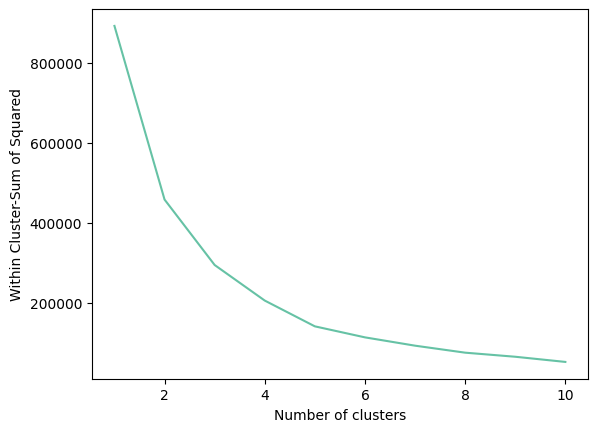

In [57]:
# elbow method 사용해서 적절한 군집 수 구하기
wcss = []
for i in range(1,11): # 군집 1번 부터 10번까지
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42) # 군집 별로
    kmeans.fit(training_data_set1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss) # 배열에 담긴 inertia_ 값 그래프로 그리기
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster-Sum of Squared')
plt.show() # elbow point = 3

In [76]:
# 중심점(Centroid) 구하기
centroids = training_data_set1.sample(3,random_state=1)
centroids

,calorie,carbohydrate,protein,fat,fiber,calcium,phosphorus,iron,sodium,potassium,vitamin_A,thiamine,riboflavin,niacin,vitamin_C,cluster
419,53.000000,11.4,1.1,0.2,0.3,1.7,17.200001,0.2,0.300000,29.200001,0.000000,0.0,0.0,0.3,0.000000,0
14,98.199997,16.9,6.1,0.4,0.8,12.6,60.000000,0.5,19.200001,143.800003,252.399994,0.0,0.0,2.7,1.400000,1
302,120.800003,26.5,2.8,0.2,0.6,6.0,35.799999,0.7,2.200000,145.300003,50.900002,0.1,0.0,0.9,17.200001,2


In [77]:
# 형변환
final_data = training_data_set1.astype(float)
final_centroids = centroids.astype(float)

# 각 데이터에 대하여, 각 중심점과의 유클리드 거리 계산
distance = sp.spatial.distance.cdist(training_data_set1,centroids,"euclidean")

# 가장 거리가 짧은 중심점의 cluster로 할당
cluster_num = np.argmin(distance, axis=1)

# 결과 확인
result = training_data_set1
result["cluster"] = np.array(cluster_num)
result # 군집화 잘 안 됨 -> 칼로리 제외하고 영양소만으로 다시 

,calorie,carbohydrate,protein,fat,fiber,calcium,phosphorus,iron,sodium,potassium,vitamin_A,thiamine,riboflavin,niacin,vitamin_C,cluster
0,86.000000,18.700001,1.7,0.1,0.1,0.900000,34.700001,0.5,0.700000,43.900002,0.000000,0.0,0.0,0.4,0.000000,0
3,117.000000,21.400000,6.2,0.4,0.7,9.800000,63.400002,0.5,16.400000,157.199997,4.800000,0.0,0.0,2.7,5.200000,2
14,98.199997,16.900000,6.1,0.4,0.8,12.600000,60.000000,0.5,19.200001,143.800003,252.399994,0.0,0.0,2.7,1.400000,1
25,93.500000,15.700000,6.1,0.4,0.7,18.500000,58.299999,0.5,15.600000,105.400002,52.799999,0.0,0.0,2.6,7.400000,2
35,94.199997,20.700001,2.0,0.1,0.7,9.000000,29.000000,0.5,6.400000,96.000000,125.699997,0.0,0.0,0.5,5.400000,2
47,87.599998,19.299999,1.6,0.1,0.4,3.200000,35.599998,0.5,2.100000,81.099998,1.900000,0.0,0.0,0.4,2.500000,0
52,35.500000,8.000000,1.4,0.1,0.9,5.300000,36.799999,0.5,7.400000,305.799988,1.500000,0.1,0.0,0.8,17.299999,2
56,100.599998,22.000000,2.3,0.2,0.8,9.900000,28.200001,0.5,1.000000,98.199997,8.000000,0.1,0.0,2.7,7.000000,2
67,54.700001,12.400000,1.5,0.3,1.0,20.500000,33.900002,0.5,1.800000,219.300003,5.000000,0.0,0.0,0.6,9.500000,2
73,75.800003,16.500000,1.9,0.1,0.8,13.000000,36.599998,0.5,4.300000,87.300003,138.500000,0.0,0.0,0.5,10.400000,2


### 영양소 기반 군집화

In [52]:
training_data_set2 = nc_matrix.iloc[:,2:]
training_data_set2

,carbohydrate,protein,fat,fiber,calcium,phosphorus,iron,sodium,potassium,vitamin_A,thiamine,riboflavin,niacin,vitamin_C
0,18.700001,1.7,0.1,0.1,0.900000,34.700001,0.5,0.700000,43.900002,0.000000,0.0,0.0,0.4,0.000000
3,21.400000,6.2,0.4,0.7,9.800000,63.400002,0.5,16.400000,157.199997,4.800000,0.0,0.0,2.7,5.200000
14,16.900000,6.1,0.4,0.8,12.600000,60.000000,0.5,19.200001,143.800003,252.399994,0.0,0.0,2.7,1.400000
25,15.700000,6.1,0.4,0.7,18.500000,58.299999,0.5,15.600000,105.400002,52.799999,0.0,0.0,2.6,7.400000
35,20.700001,2.0,0.1,0.7,9.000000,29.000000,0.5,6.400000,96.000000,125.699997,0.0,0.0,0.5,5.400000
47,19.299999,1.6,0.1,0.4,3.200000,35.599998,0.5,2.100000,81.099998,1.900000,0.0,0.0,0.4,2.500000
52,8.000000,1.4,0.1,0.9,5.300000,36.799999,0.5,7.400000,305.799988,1.500000,0.1,0.0,0.8,17.299999
56,22.000000,2.3,0.2,0.8,9.900000,28.200001,0.5,1.000000,98.199997,8.000000,0.1,0.0,2.7,7.000000
67,12.400000,1.5,0.3,1.0,20.500000,33.900002,0.5,1.800000,219.300003,5.000000,0.0,0.0,0.6,9.500000
73,16.500000,1.9,0.1,0.8,13.000000,36.599998,0.5,4.300000,87.300003,138.500000,0.0,0.0,0.5,10.400000


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

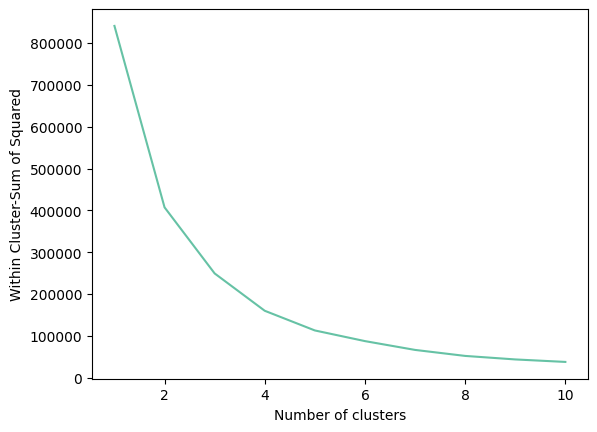

In [53]:
# elbow method 사용해서 적절한 군집 수 구하기
wcss = []
for i in range(1,11): # 군집 1번 부터 10번까지
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42) # 군집 별로
    kmeans.fit(training_data_set2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss) # 배열에 담긴 inertia_ 값 그래프로 그리기
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster-Sum of Squared')
plt.show() # elbow point = 3

In [64]:
# 중심점(Centroid) 구하기
centroids = training_data_set2.sample(3,random_state=1)
centroids

,carbohydrate,protein,fat,fiber,calcium,phosphorus,iron,sodium,potassium,vitamin_A,thiamine,riboflavin,niacin,vitamin_C
419,11.4,1.1,0.2,0.3,1.7,17.200001,0.2,0.300000,29.200001,0.000000,0.0,0.0,0.3,0.000000
14,16.9,6.1,0.4,0.8,12.6,60.000000,0.5,19.200001,143.800003,252.399994,0.0,0.0,2.7,1.400000
302,26.5,2.8,0.2,0.6,6.0,35.799999,0.7,2.200000,145.300003,50.900002,0.1,0.0,0.9,17.200001


In [65]:
# 형변환
final_data = training_data_set2.astype(float)
final_centroids = centroids.astype(float)

# 각 데이터에 대하여, 각 중심점과의 유클리드 거리 계산
distance = sp.spatial.distance.cdist(training_data_set2,centroids,"euclidean")

# 가장 거리가 짧은 중심점의 cluster로 할당
cluster_num = np.argmin(distance, axis=1)

# 결과 확인
result = training_data_set2
result["cluster"] = np.array(cluster_num)
result # 군집화 잘 안 됨 -> 영양소 중에 빌런 있음

,carbohydrate,protein,fat,fiber,calcium,phosphorus,iron,sodium,potassium,vitamin_A,thiamine,riboflavin,niacin,vitamin_C,cluster
0,18.700001,1.7,0.1,0.1,0.900000,34.700001,0.5,0.700000,43.900002,0.000000,0.0,0.0,0.4,0.000000,0
3,21.400000,6.2,0.4,0.7,9.800000,63.400002,0.5,16.400000,157.199997,4.800000,0.0,0.0,2.7,5.200000,2
14,16.900000,6.1,0.4,0.8,12.600000,60.000000,0.5,19.200001,143.800003,252.399994,0.0,0.0,2.7,1.400000,1
25,15.700000,6.1,0.4,0.7,18.500000,58.299999,0.5,15.600000,105.400002,52.799999,0.0,0.0,2.6,7.400000,2
35,20.700001,2.0,0.1,0.7,9.000000,29.000000,0.5,6.400000,96.000000,125.699997,0.0,0.0,0.5,5.400000,2
47,19.299999,1.6,0.1,0.4,3.200000,35.599998,0.5,2.100000,81.099998,1.900000,0.0,0.0,0.4,2.500000,0
52,8.000000,1.4,0.1,0.9,5.300000,36.799999,0.5,7.400000,305.799988,1.500000,0.1,0.0,0.8,17.299999,2
56,22.000000,2.3,0.2,0.8,9.900000,28.200001,0.5,1.000000,98.199997,8.000000,0.1,0.0,2.7,7.000000,2
67,12.400000,1.5,0.3,1.0,20.500000,33.900002,0.5,1.800000,219.300003,5.000000,0.0,0.0,0.6,9.500000,2
73,16.500000,1.9,0.1,0.8,13.000000,36.599998,0.5,4.300000,87.300003,138.500000,0.0,0.0,0.5,10.400000,2


In [ ]:
### 'thiamine','riboflavin','niacin' 열 제외

In [67]:
simple_set1 = nc_matrix.drop(columns=['thiamine','riboflavin','niacin'])
simple_set1

,food_name,calorie,carbohydrate,protein,fat,fiber,calcium,phosphorus,iron,sodium,potassium,vitamin_A,vitamin_C
0,찹쌀미음,86.000000,18.700001,1.7,0.1,0.1,0.900000,34.700001,0.5,0.700000,43.900002,0.000000,0.000000
3,닭가슴살고구마죽,117.000000,21.400000,6.2,0.4,0.7,9.800000,63.400002,0.5,16.400000,157.199997,4.800000,5.200000
14,닭가슴살당근죽,98.199997,16.900000,6.1,0.4,0.8,12.600000,60.000000,0.5,19.200001,143.800003,252.399994,1.400000
25,닭가슴살청경채죽,93.500000,15.700000,6.1,0.4,0.7,18.500000,58.299999,0.5,15.600000,105.400002,52.799999,7.400000
35,찹쌀컬리플라워당근죽,94.199997,20.700001,2.0,0.1,0.7,9.000000,29.000000,0.5,6.400000,96.000000,125.699997,5.400000
47,고구마찹쌀진밥,87.599998,19.299999,1.6,0.1,0.4,3.200000,35.599998,0.5,2.100000,81.099998,1.900000,2.500000
52,멜론감자수프,35.500000,8.000000,1.4,0.1,0.9,5.300000,36.799999,0.5,7.400000,305.799988,1.500000,17.299999
56,애호박완두콩무른밥,100.599998,22.000000,2.3,0.2,0.8,9.900000,28.200001,0.5,1.000000,98.199997,8.000000,7.000000
67,감자바나나요구르트으깸,54.700001,12.400000,1.5,0.3,1.0,20.500000,33.900002,0.5,1.800000,219.300003,5.000000,9.500000
73,브로콜리당근죽,75.800003,16.500000,1.9,0.1,0.8,13.000000,36.599998,0.5,4.300000,87.300003,138.500000,10.400000


In [69]:
training_data_set3 = simple_set.iloc[:,1:]
training_data_set3

,calorie,carbohydrate,protein,fat,fiber,calcium,phosphorus,iron,sodium,potassium,vitamin_A,vitamin_C
0,86.000000,18.700001,1.7,0.1,0.1,0.900000,34.700001,0.5,0.700000,43.900002,0.000000,0.000000
3,117.000000,21.400000,6.2,0.4,0.7,9.800000,63.400002,0.5,16.400000,157.199997,4.800000,5.200000
14,98.199997,16.900000,6.1,0.4,0.8,12.600000,60.000000,0.5,19.200001,143.800003,252.399994,1.400000
25,93.500000,15.700000,6.1,0.4,0.7,18.500000,58.299999,0.5,15.600000,105.400002,52.799999,7.400000
35,94.199997,20.700001,2.0,0.1,0.7,9.000000,29.000000,0.5,6.400000,96.000000,125.699997,5.400000
47,87.599998,19.299999,1.6,0.1,0.4,3.200000,35.599998,0.5,2.100000,81.099998,1.900000,2.500000
52,35.500000,8.000000,1.4,0.1,0.9,5.300000,36.799999,0.5,7.400000,305.799988,1.500000,17.299999
56,100.599998,22.000000,2.3,0.2,0.8,9.900000,28.200001,0.5,1.000000,98.199997,8.000000,7.000000
67,54.700001,12.400000,1.5,0.3,1.0,20.500000,33.900002,0.5,1.800000,219.300003,5.000000,9.500000
73,75.800003,16.500000,1.9,0.1,0.8,13.000000,36.599998,0.5,4.300000,87.300003,138.500000,10.400000


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

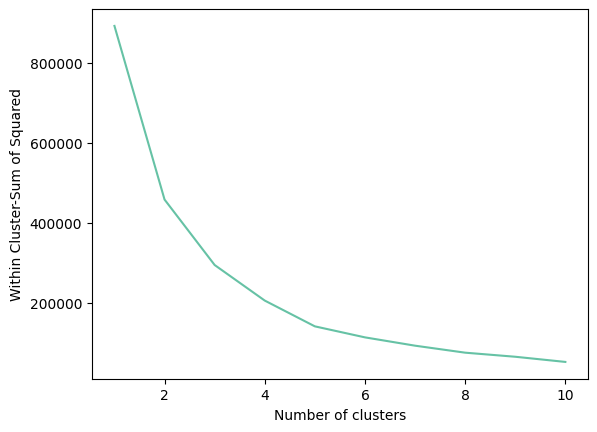

In [70]:
# elbow method 사용해서 적절한 군집 수 구하기
wcss = []
for i in range(1,11): # 군집 1번 부터 10번까지
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42) # 군집 별로
    kmeans.fit(training_data_set3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss) # 배열에 담긴 inertia_ 값 그래프로 그리기
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster-Sum of Squared')
plt.show() # elbow point = 3

In [81]:
# 중심점(Centroid) 구하기
centroids = training_data_set3.sample(3,random_state=1)
centroids

,calorie,carbohydrate,protein,fat,fiber,calcium,phosphorus,iron,sodium,potassium,vitamin_A,vitamin_C
419,53.000000,11.4,1.1,0.2,0.3,1.7,17.200001,0.2,0.300000,29.200001,0.000000,0.000000
14,98.199997,16.9,6.1,0.4,0.8,12.6,60.000000,0.5,19.200001,143.800003,252.399994,1.400000
302,120.800003,26.5,2.8,0.2,0.6,6.0,35.799999,0.7,2.200000,145.300003,50.900002,17.200001


In [82]:
# 형변환
final_data = training_data_set3.astype(float)
final_centroids = centroids.astype(float)

# 각 데이터에 대하여, 각 중심점과의 유클리드 거리 계산
distance = sp.spatial.distance.cdist(training_data_set3,centroids,"euclidean")

# 가장 거리가 짧은 중심점의 cluster로 할당
cluster_num = np.argmin(distance, axis=1)

# 결과 확인
result = training_data_set3
result["cluster"] = np.array(cluster_num)
result # 군집화 자꾸 cluster1이 문제임

,calorie,carbohydrate,protein,fat,fiber,calcium,phosphorus,iron,sodium,potassium,vitamin_A,vitamin_C,cluster
0,86.000000,18.700001,1.7,0.1,0.1,0.900000,34.700001,0.5,0.700000,43.900002,0.000000,0.000000,0
3,117.000000,21.400000,6.2,0.4,0.7,9.800000,63.400002,0.5,16.400000,157.199997,4.800000,5.200000,2
14,98.199997,16.900000,6.1,0.4,0.8,12.600000,60.000000,0.5,19.200001,143.800003,252.399994,1.400000,1
25,93.500000,15.700000,6.1,0.4,0.7,18.500000,58.299999,0.5,15.600000,105.400002,52.799999,7.400000,2
35,94.199997,20.700001,2.0,0.1,0.7,9.000000,29.000000,0.5,6.400000,96.000000,125.699997,5.400000,2
47,87.599998,19.299999,1.6,0.1,0.4,3.200000,35.599998,0.5,2.100000,81.099998,1.900000,2.500000,0
52,35.500000,8.000000,1.4,0.1,0.9,5.300000,36.799999,0.5,7.400000,305.799988,1.500000,17.299999,2
56,100.599998,22.000000,2.3,0.2,0.8,9.900000,28.200001,0.5,1.000000,98.199997,8.000000,7.000000,2
67,54.700001,12.400000,1.5,0.3,1.0,20.500000,33.900002,0.5,1.800000,219.300003,5.000000,9.500000,2
73,75.800003,16.500000,1.9,0.1,0.8,13.000000,36.599998,0.5,4.300000,87.300003,138.500000,10.400000,2


In [84]:
cluster1 = result[result['cluster'] == 1]
cluster1 # 탄수화물 열 제외 시도

,calorie,carbohydrate,protein,fat,fiber,calcium,phosphorus,iron,sodium,potassium,vitamin_A,vitamin_C,cluster
14,98.199997,16.9,6.1,0.4,0.8,12.6,60.0,0.5,19.200001,143.800003,252.399994,1.4,1
253,63.500000,16.0,1.1,0.2,2.4,22.5,29.0,0.6,15.500000,348.500000,632.000000,7.0,1


In [85]:
simple_set2 = nc_matrix.drop(columns=['thiamine','riboflavin','niacin','carbohydrate'])
simple_set2

,food_name,calorie,protein,fat,fiber,calcium,phosphorus,iron,sodium,potassium,vitamin_A,vitamin_C
0,찹쌀미음,86.000000,1.7,0.1,0.1,0.900000,34.700001,0.5,0.700000,43.900002,0.000000,0.000000
3,닭가슴살고구마죽,117.000000,6.2,0.4,0.7,9.800000,63.400002,0.5,16.400000,157.199997,4.800000,5.200000
14,닭가슴살당근죽,98.199997,6.1,0.4,0.8,12.600000,60.000000,0.5,19.200001,143.800003,252.399994,1.400000
25,닭가슴살청경채죽,93.500000,6.1,0.4,0.7,18.500000,58.299999,0.5,15.600000,105.400002,52.799999,7.400000
35,찹쌀컬리플라워당근죽,94.199997,2.0,0.1,0.7,9.000000,29.000000,0.5,6.400000,96.000000,125.699997,5.400000
47,고구마찹쌀진밥,87.599998,1.6,0.1,0.4,3.200000,35.599998,0.5,2.100000,81.099998,1.900000,2.500000
52,멜론감자수프,35.500000,1.4,0.1,0.9,5.300000,36.799999,0.5,7.400000,305.799988,1.500000,17.299999
56,애호박완두콩무른밥,100.599998,2.3,0.2,0.8,9.900000,28.200001,0.5,1.000000,98.199997,8.000000,7.000000
67,감자바나나요구르트으깸,54.700001,1.5,0.3,1.0,20.500000,33.900002,0.5,1.800000,219.300003,5.000000,9.500000
73,브로콜리당근죽,75.800003,1.9,0.1,0.8,13.000000,36.599998,0.5,4.300000,87.300003,138.500000,10.400000


In [86]:
training_data_set4 = nc_matrix.iloc[:,1:]
training_data_set4

,calorie,carbohydrate,protein,fat,fiber,calcium,phosphorus,iron,sodium,potassium,vitamin_A,thiamine,riboflavin,niacin,vitamin_C
0,86.000000,18.700001,1.7,0.1,0.1,0.900000,34.700001,0.5,0.700000,43.900002,0.000000,0.0,0.0,0.4,0.000000
3,117.000000,21.400000,6.2,0.4,0.7,9.800000,63.400002,0.5,16.400000,157.199997,4.800000,0.0,0.0,2.7,5.200000
14,98.199997,16.900000,6.1,0.4,0.8,12.600000,60.000000,0.5,19.200001,143.800003,252.399994,0.0,0.0,2.7,1.400000
25,93.500000,15.700000,6.1,0.4,0.7,18.500000,58.299999,0.5,15.600000,105.400002,52.799999,0.0,0.0,2.6,7.400000
35,94.199997,20.700001,2.0,0.1,0.7,9.000000,29.000000,0.5,6.400000,96.000000,125.699997,0.0,0.0,0.5,5.400000
47,87.599998,19.299999,1.6,0.1,0.4,3.200000,35.599998,0.5,2.100000,81.099998,1.900000,0.0,0.0,0.4,2.500000
52,35.500000,8.000000,1.4,0.1,0.9,5.300000,36.799999,0.5,7.400000,305.799988,1.500000,0.1,0.0,0.8,17.299999
56,100.599998,22.000000,2.3,0.2,0.8,9.900000,28.200001,0.5,1.000000,98.199997,8.000000,0.1,0.0,2.7,7.000000
67,54.700001,12.400000,1.5,0.3,1.0,20.500000,33.900002,0.5,1.800000,219.300003,5.000000,0.0,0.0,0.6,9.500000
73,75.800003,16.500000,1.9,0.1,0.8,13.000000,36.599998,0.5,4.300000,87.300003,138.500000,0.0,0.0,0.5,10.400000


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

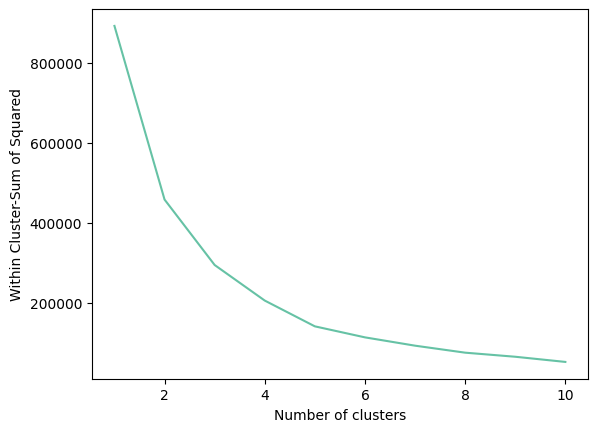

In [87]:
# elbow method 사용해서 적절한 군집 수 구하기
wcss = []
for i in range(1,11): # 군집 1번 부터 10번까지
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42) # 군집 별로
    kmeans.fit(training_data_set4)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss) # 배열에 담긴 inertia_ 값 그래프로 그리기
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster-Sum of Squared')
plt.show() # elbow point = 3

In [88]:
# 중심점(Centroid) 구하기
centroids = training_data_set4.sample(3,random_state=1)
centroids

,calorie,carbohydrate,protein,fat,fiber,calcium,phosphorus,iron,sodium,potassium,vitamin_A,thiamine,riboflavin,niacin,vitamin_C
419,53.000000,11.4,1.1,0.2,0.3,1.7,17.200001,0.2,0.300000,29.200001,0.000000,0.0,0.0,0.3,0.000000
14,98.199997,16.9,6.1,0.4,0.8,12.6,60.000000,0.5,19.200001,143.800003,252.399994,0.0,0.0,2.7,1.400000
302,120.800003,26.5,2.8,0.2,0.6,6.0,35.799999,0.7,2.200000,145.300003,50.900002,0.1,0.0,0.9,17.200001


In [89]:
# 형변환
final_data = training_data_set4.astype(float)
final_centroids = centroids.astype(float)

# 각 데이터에 대하여, 각 중심점과의 유클리드 거리 계산
distance = sp.spatial.distance.cdist(training_data_set4,centroids,"euclidean")

# 가장 거리가 짧은 중심점의 cluster로 할당
cluster_num = np.argmin(distance, axis=1)

# 결과 확인
result = training_data_set4
result["cluster"] = np.array(cluster_num)
result # 군집화 잘 안 됨 

,calorie,carbohydrate,protein,fat,fiber,calcium,phosphorus,iron,sodium,potassium,vitamin_A,thiamine,riboflavin,niacin,vitamin_C,cluster
0,86.000000,18.700001,1.7,0.1,0.1,0.900000,34.700001,0.5,0.700000,43.900002,0.000000,0.0,0.0,0.4,0.000000,0
3,117.000000,21.400000,6.2,0.4,0.7,9.800000,63.400002,0.5,16.400000,157.199997,4.800000,0.0,0.0,2.7,5.200000,2
14,98.199997,16.900000,6.1,0.4,0.8,12.600000,60.000000,0.5,19.200001,143.800003,252.399994,0.0,0.0,2.7,1.400000,1
25,93.500000,15.700000,6.1,0.4,0.7,18.500000,58.299999,0.5,15.600000,105.400002,52.799999,0.0,0.0,2.6,7.400000,2
35,94.199997,20.700001,2.0,0.1,0.7,9.000000,29.000000,0.5,6.400000,96.000000,125.699997,0.0,0.0,0.5,5.400000,2
47,87.599998,19.299999,1.6,0.1,0.4,3.200000,35.599998,0.5,2.100000,81.099998,1.900000,0.0,0.0,0.4,2.500000,0
52,35.500000,8.000000,1.4,0.1,0.9,5.300000,36.799999,0.5,7.400000,305.799988,1.500000,0.1,0.0,0.8,17.299999,2
56,100.599998,22.000000,2.3,0.2,0.8,9.900000,28.200001,0.5,1.000000,98.199997,8.000000,0.1,0.0,2.7,7.000000,2
67,54.700001,12.400000,1.5,0.3,1.0,20.500000,33.900002,0.5,1.800000,219.300003,5.000000,0.0,0.0,0.6,9.500000,2
73,75.800003,16.500000,1.9,0.1,0.8,13.000000,36.599998,0.5,4.300000,87.300003,138.500000,0.0,0.0,0.5,10.400000,2
